**Se tomo el mismo proyecto de operaciones con el punto y se trabajo con el**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class Simulacion:
    """
    Simulación para el desplazamiento, rotación y cálculo de vectores dentro de un área rectangular fijo de 10x10 unidades.

    Parametros:
        punto (list): Las coordenadas iniciales del punto en el espacio 2D (ej. [x, y]).
        color_rectangulo (str): Color del rectángulo que representa el área (por defecto 'blue').
    """

    def __init__(self, punto, color_rectangulo='blue'):
        self.ancho = 10  # El área rectangular tendrá un ancho fijo de 10 unidades
        self.alto = 10   # El área rectangular tendrá un alto fijo de 10 unidades
        self.punto = np.array(punto)  # Inicializamos el punto como un array de NumPy para fácil manipulación
        self.color_rectangulo = color_rectangulo  # Color del rectángulo

    def desplazar_punto(self, x, direccion):
        """
        Desplaza el punto dentro del área rectangular en la dirección dada.

        Parametros:
            x (int): Distancia que se moverá el punto.
            direccion (str): Dirección del desplazamiento ('derecha', 'izquierda', 'arriba', 'abajo').

        Modifica:
            El atributo 'punto' con las nuevas coordenadas del punto después del desplazamiento.
        """
        desplazamiento = np.array([0, 0])  # Inicializamos el desplazamiento como un vector nulo

        # Dependiendo de la dirección, cambiamos las coordenadas del desplazamiento
        if direccion == 'derecha':
            desplazamiento[0] = x
        elif direccion == 'izquierda':
            desplazamiento[0] = -x
        elif direccion == 'arriba':
            desplazamiento[1] = x
        elif direccion == 'abajo':
            desplazamiento[1] = -x
        else:
            print("Dirección no válida.")
            return

        # Aplicamos el desplazamiento y nos aseguramos de que el punto no se salga del área
        self.punto = np.clip(self.punto + desplazamiento, [0, 0], [self.ancho, self.alto])

    def producto_interno(self, vector1, vector2):
        """
        Calcula el producto interno entre dos vectores.

        Parametros:
            vector1 (numpy.ndarray): Primer vector.
            vector2 (numpy.ndarray): Segundo vector.

        Retorna:
            float: El resultado del producto escalar entre los dos vectores.
        """
        return np.dot(vector1, vector2)  # Calculamos el producto escalar usando np.dot

    def norma_vectorial(self, vector):
        """
        Calcula la norma o magnitud de un vector.

        Parametros:
            vector (numpy.ndarray): El vector cuya norma se quiere calcular.

        Retorna:
            float: La norma del vector (longitud del vector).
        """
        return np.linalg.norm(vector)  # Calculamos la norma usando np.linalg.norm

    def rotar_vector(self, vector, angulo):
        """
        Rota un vector en el plano 2D por un ángulo dado en grados.

        Parametros:
            vector (numpy.ndarray): El vector que se va a rotar.
            angulo (float): El ángulo de rotación en grados.

        Retorna:
            numpy.ndarray: El vector rotado.
        """
        angulo_rad = np.radians(angulo)  # Convertimos el ángulo de grados a radianes
        # Matriz de rotación 2x2 para rotar el vector
        rotacion_matrix = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad)],
                                    [np.sin(angulo_rad), np.cos(angulo_rad)]])
        # Multiplicamos la matriz de rotación por el vector para obtener el nuevo vector rotado
        return np.dot(rotacion_matrix, vector)

    def graficar_vector_rotado(self, vector, angulo_rotacion):
        """
        Grafica el vector original y su versión rotada, con el plano cartesiano visible.

        Parametros:
            vector (numpy.ndarray): El vector que se va a graficar.
            angulo_rotacion (float): Ángulo de rotación (en grados).
        """
        # Crear la figura
        fig, ax = plt.subplots()

        # Establecer los límites de los ejes
        ax.set_xlim(-10, 10)  # Usamos 10 unidades fijas en X
        ax.set_ylim(-10, 10)  # Usamos 10 unidades fijas en Y

        # Dibujar el plano cartesiano
        ax.axhline(0, color='black',linewidth=1)  # Eje X
        ax.axvline(0, color='black',linewidth=1)  # Eje Y
        ax.set_xticks(np.arange(-10, 11, 1))  # Establecemos las marcas en el eje X
        ax.set_yticks(np.arange(-10, 11, 1))  # Establecemos las marcas en el eje Y
        ax.grid(True, which='both')  # Habilitamos la cuadrícula

        # Dibujar el vector original
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color="blue", label="Vector Original")

        # Rotar el vector y dibujar el vector rotado
        vector_rotado = self.rotar_vector(vector, angulo_rotacion)
        ax.quiver(0, 0, vector_rotado[0], vector_rotado[1], angles='xy', scale_units='xy', scale=1, color="red", label=f"Vector Rotado ({angulo_rotacion}°)")

        # Establecer título y leyenda
        ax.set_title("Vector Original y Vector Rotado")
        ax.legend()

        # Mostrar el gráfico
        plt.show()

In [26]:
# Vectores de ejemplo
vector1 = np.array([1, 2])
vector2 = np.array([3, 4])

# Usamos el método para calcular el producto interno
producto = sim.producto_interno(vector1, vector2)

# Imprimir el resultado
print("Producto interno de vector1 y vector2:", producto)

Producto interno de vector1 y vector2: 11


In [27]:
# Vector de ejemplo
vector = np.array([3, 4])

# Usamos el método para calcular la norma del vector
norma = sim.norma_vectorial(vector)

# Imprimir el resultado
print("Norma del vector:", norma)

Norma del vector: 5.0


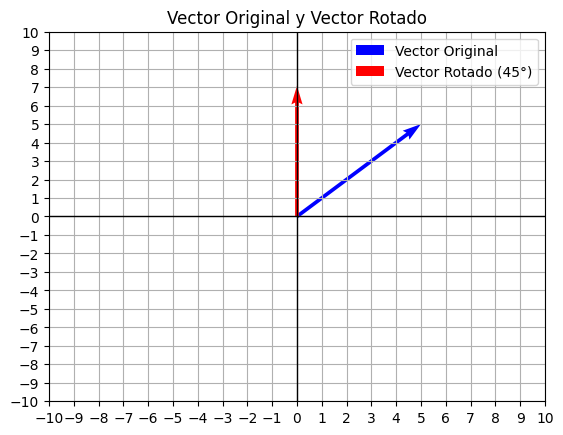

In [28]:
sim = Simulacion([5, 5])  # Creamos la simulación con el punto en [5, 5]

# Vector de ejemplo
vector = np.array([5, 5])

# Ángulo de rotación
angulo = 45

# Llamar al método para graficar el vector original y el rotado
sim.graficar_vector_rotado(vector, angulo)